# Computer Network with Cyber-Attack#
###  Xiangzhu Long ###

We will analyze the connectivity of a computer network as it undergoes a cyber-attack. In particular, we will simulate an attack on this network in which an increasing number of servers are disabled. In computational terms, we will model the network by an undirected graph and repeatedly delete nodes from this graph. We will then measure the resilience of the graph in terms of the size of the largest remaining connected component as a function of the number of nodes deleted.

## Question 1 ##

To begin our analysis, we will examine the resilience of the computer network under an attack in which servers are chosen at random. We will then compare the resilience of the network to the resilience of ER and UPA graphs of similar size.

To begin, you should determine the probability p such that the ER graph computed using this edge probability has approximately the same number of edges as the computer network. (Your choice for p should be consistent with considering each edge in the undirected graph exactly once, not twice.) Likewise, you should compute an integer m such that the number of edges in the UPA graph is close to the number of edges in the computer network. Remember that all three graphs being analyzed in this Application should have the same number of nodes and approximately the same number of edges.

p = 0.004; m = 2 or 3.

Next, you should write a function random_order that takes a graph and returns a list of the nodes in the graph in some random order. Then, for each of the three graphs (computer network, ER, UPA), compute a random attack order using random_order and use this attack order in compute_resilience to compute the resilience of the graph.

Once you have computed the resilience for all three graphs, plot the results as three curves combined in a single plot. (Use a line plot for each curve.) The horizontal axis for your single plot be the the number of nodes removed (ranging from zero to the number of nodes in the graph) while the vertical axis should be the size of the largest connect component in the graphs resulting from the node removal. For this question (and others) involving multiple curves in a single plot, please include a legend in your plot that distinguishes the three curves. The text labels in this legend should include the values for p and m that you used in computing the ER and UPA graphs, respectively. 

In [1]:
%matplotlib inline
from collections import deque
import urllib2
import random
import time
import matplotlib.pyplot as plt

In [2]:
def make_ergraph(num_nodes, prob):
    '''
    input:
        num_nodes - the number of nodes in the digraph
        prob - the probability there is an edge
    output: a complete ugraph with such number of nodes
    '''
    
    if num_nodes <= 0:
        return {}
    else:
        ugraph = {}
        for nodei in range(0, num_nodes):
            ugraph[nodei] =set([])
            
        for nodei in range(0, num_nodes):
            for nodej in range(0, num_nodes):
                if nodej != nodei:
                    rand = random.uniform(0,1)
                    if rand < prob:
                        ugraph[nodei].add(nodej)
                        ugraph[nodej].add(nodei)
        return ugraph

In [3]:
def display_state(ugraph):
    '''
    Display the number of nodes and edges of the ugraph
    '''
    print "------------------"
    print "num_node: ", len(ugraph)
    num_edge = 0
    for node, adjlist in ugraph.iteritems():
        num_edge += len(adjlist)
    num_edge = num_edge/2
    print "num_edge: ", num_edge
    print "------------------"

In [4]:
def random_order(ugraph):
    '''
    returns a list of the nodes in the graph in some random order. 
    '''
    nodelist = ugraph.keys()
    random.shuffle(nodelist)
    return nodelist

In [5]:
def bfs_visited(ugraph, start_node):
    """
    Input:
        an undiredted graph;
        a start node.
    Output:
        a set of BFS nodes starts at start_node
    """
    queue = deque()
    visited = set([start_node])
    queue.append(start_node)
    
    while len(queue) != 0:
        current = queue.popleft()
        for neighbor in ugraph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
        
    return visited

In [6]:
def cc_visited(ugraph):
    """
    Input:
        an undiredted graph.
    Output:
        connected components
    """
    nodes = [node for node in ugraph.keys()]
    components = []
    
    while len(nodes) != 0:
        start_node = random.choice(nodes);
        visited = bfs_visited(ugraph, start_node)
        components.append(visited)
        
        for cc_node in visited:
            nodes.remove(cc_node)
        
    return components

In [7]:
def largest_cc_size(ugraph):
    """
    Input:
        an undiredted graph.
    Output:
        the size of the largest component in ugraph
    """
    components = cc_visited(ugraph)
    max_size = 0;
    
    for size in components:
        if max_size < len(size):
            max_size = len(size)
        
    return max_size 

In [8]:
def compute_resilience(ugraph, attack_order):
    """
    Input:
        an undiredted graph;
        a list of nodes that need to be removed
    Output:
        a list of components
    """
    components = []
    components.append(largest_cc_size(ugraph))
    
    for node in attack_order:
        if node in ugraph.keys():
            for edge in ugraph[node]:
                ugraph[edge].remove(node)
            ugraph.pop(node)
            components.append(largest_cc_size(ugraph))
    
    return components

In [9]:
ER_graph = make_ergraph(1347, 0.004)
display_state(ER_graph)
ER_rand = random_order(ER_graph)
ER_resilience = compute_resilience(ER_graph, ER_rand)

------------------
num_node:  1347
num_edge:  7165
------------------


In [10]:
class UPATrial:
    """
    Simple class to encapsulate optimizated trials for the UPA algorithm
    
    Maintains a list of node numbers with multiple instance of each number.
    The number of instances of each node number are
    in the same proportion as the desired probabilities
    
    Uses random.choice() to select a node number from this list for each trial.
    """

    def __init__(self, num_nodes):
        """
        Initialize a UPATrial object corresponding to a 
        complete graph with num_nodes nodes
        
        Note the initial list of node numbers has num_nodes copies of
        each node number
        """
        self._num_nodes = num_nodes
        self._node_numbers = [node for node in range(num_nodes) for dummy_idx in range(num_nodes)]


    def run_trial(self, num_nodes):
        """
        Conduct num_nodes trials using by applying random.choice()
        to the list of node numbers
        
        Updates the list of node numbers so that each node number
        appears in correct ratio
        
        Returns:
        Set of nodes
        """
        
        # compute the neighbors for the newly-created node
        new_node_neighbors = set()
        for _ in range(num_nodes):
            new_node_neighbors.add(random.choice(self._node_numbers))
        
        # update the list of node numbers so that each node number 
        # appears in the correct ratio
        self._node_numbers.append(self._num_nodes)
        for dummy_idx in range(len(new_node_neighbors)):
            self._node_numbers.append(self._num_nodes)
        self._node_numbers.extend(list(new_node_neighbors))
        
        #update the number of nodes
        self._num_nodes += 1
        return new_node_neighbors

In [11]:
def make_complete_graph(num_nodes):
    """
    returns a dictionary corresponding to a complete directed graph 
    with the specified number of nodes. 
    """
    complete_graph = {}
    
    for node in range(num_nodes):
        node_set = set()
        for base_node in range(num_nodes):
            node_set.add(base_node)
        node_set.remove(node)
        complete_graph[node] = node_set
    
    return complete_graph

In [12]:
def UPA(n, m):
    '''
    generate a random ugraph
    n: total number of nodes in the output graph
    m: number of nodes in the start_graph (a complete digraph), avg degree of the simulated graph
    output: a UPA digraph with n nodes
    '''
    
    graphV = make_complete_graph(m)
    #print "V:", graphV
    graphUPA = UPATrial(m)
    for i in range(m, n):
        #print graphDPA._node_numbers
        new_neighbors = graphUPA.run_trial(m)
        #print "new_neighbors:", new_neighbors
        graphV[i] = new_neighbors
        for node in new_neighbors:
            graphV[node].add(i)
    return graphV

In [13]:
UPA_graph = UPA(1347, 2)
display_state(UPA_graph)
UPA_rand = random_order(UPA_graph)
UPA_resilience = compute_resilience(UPA_graph, UPA_rand)

------------------
num_node:  1347
num_edge:  2676
------------------


In [14]:
def load_graph(graph_url):
    """
    Function that loads a graph given the URL
    for a text representation of the graph
    
    Returns a dictionary that models a graph
    """
    graph_file = urllib2.urlopen(graph_url)
    graph_text = graph_file.read()
    graph_lines = graph_text.split('\n')
    graph_lines = graph_lines[ : -1]
    
    print "Loaded graph with", len(graph_lines), "nodes"
    
    answer_graph = {}
    for line in graph_lines:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))

    return answer_graph

In [15]:
NETWORK_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_rf7.txt"
ANS_graph = load_graph(NETWORK_URL)
display_state(ANS_graph)
ANS_rand = random_order(ANS_graph)
ANS_resilience = compute_resilience(ANS_graph, ANS_rand)

Loaded graph with 1239 nodes
------------------
num_node:  1239
num_edge:  3047
------------------


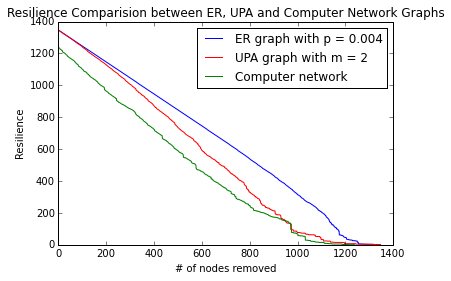

In [16]:
plt.plot(ER_resilience, '-b', label = 'ER graph with p = 0.004')
plt.plot(UPA_resilience, '-r', label='UPA graph with m = 2')
plt.plot(ANS_resilience, '-g', label='Computer network')
plt.legend(loc='upper right')
plt.ylabel('Resilience')
plt.xlabel('# of nodes removed')
plt.title('Resilience Comparision between ER, UPA and Computer Network Graphs')
plt.show()

## Question 2 ##

Consider removing a significant fraction of the nodes in each graph using random_order. We will say that a graph is resilient under this type of attack if the size of its largest connected component is roughly (within ~25%) equal to the number of nodes remaining, after the removal of each node during the attack.

Examine the shape of the three curves from your plot in Question 1. Which of the three graphs are resilient under random attacks as the first 20% of their nodes are removed? Note that there is no need to compare the three curves against each other in your answer to this question.

* Answer: All three graphs are resilient under random attack as the first 20% of their nodes are removed (unless the random order happens to remove a large number of high degree nodes, which is unlikely). In particular, all three curves have an approximate slope of −1 as the number of nodes removed varies from 0 to 240.

## Question 3 ##

In the next three problems, we will consider attack orders in which the nodes being removed are chosen based on the structure of the graph. A simple rule for these targeted attacks is to always remove a node of maximum (highest) degree from the graph. The pseudo-code description of a fast method for computing the same targeted attack order is shown:

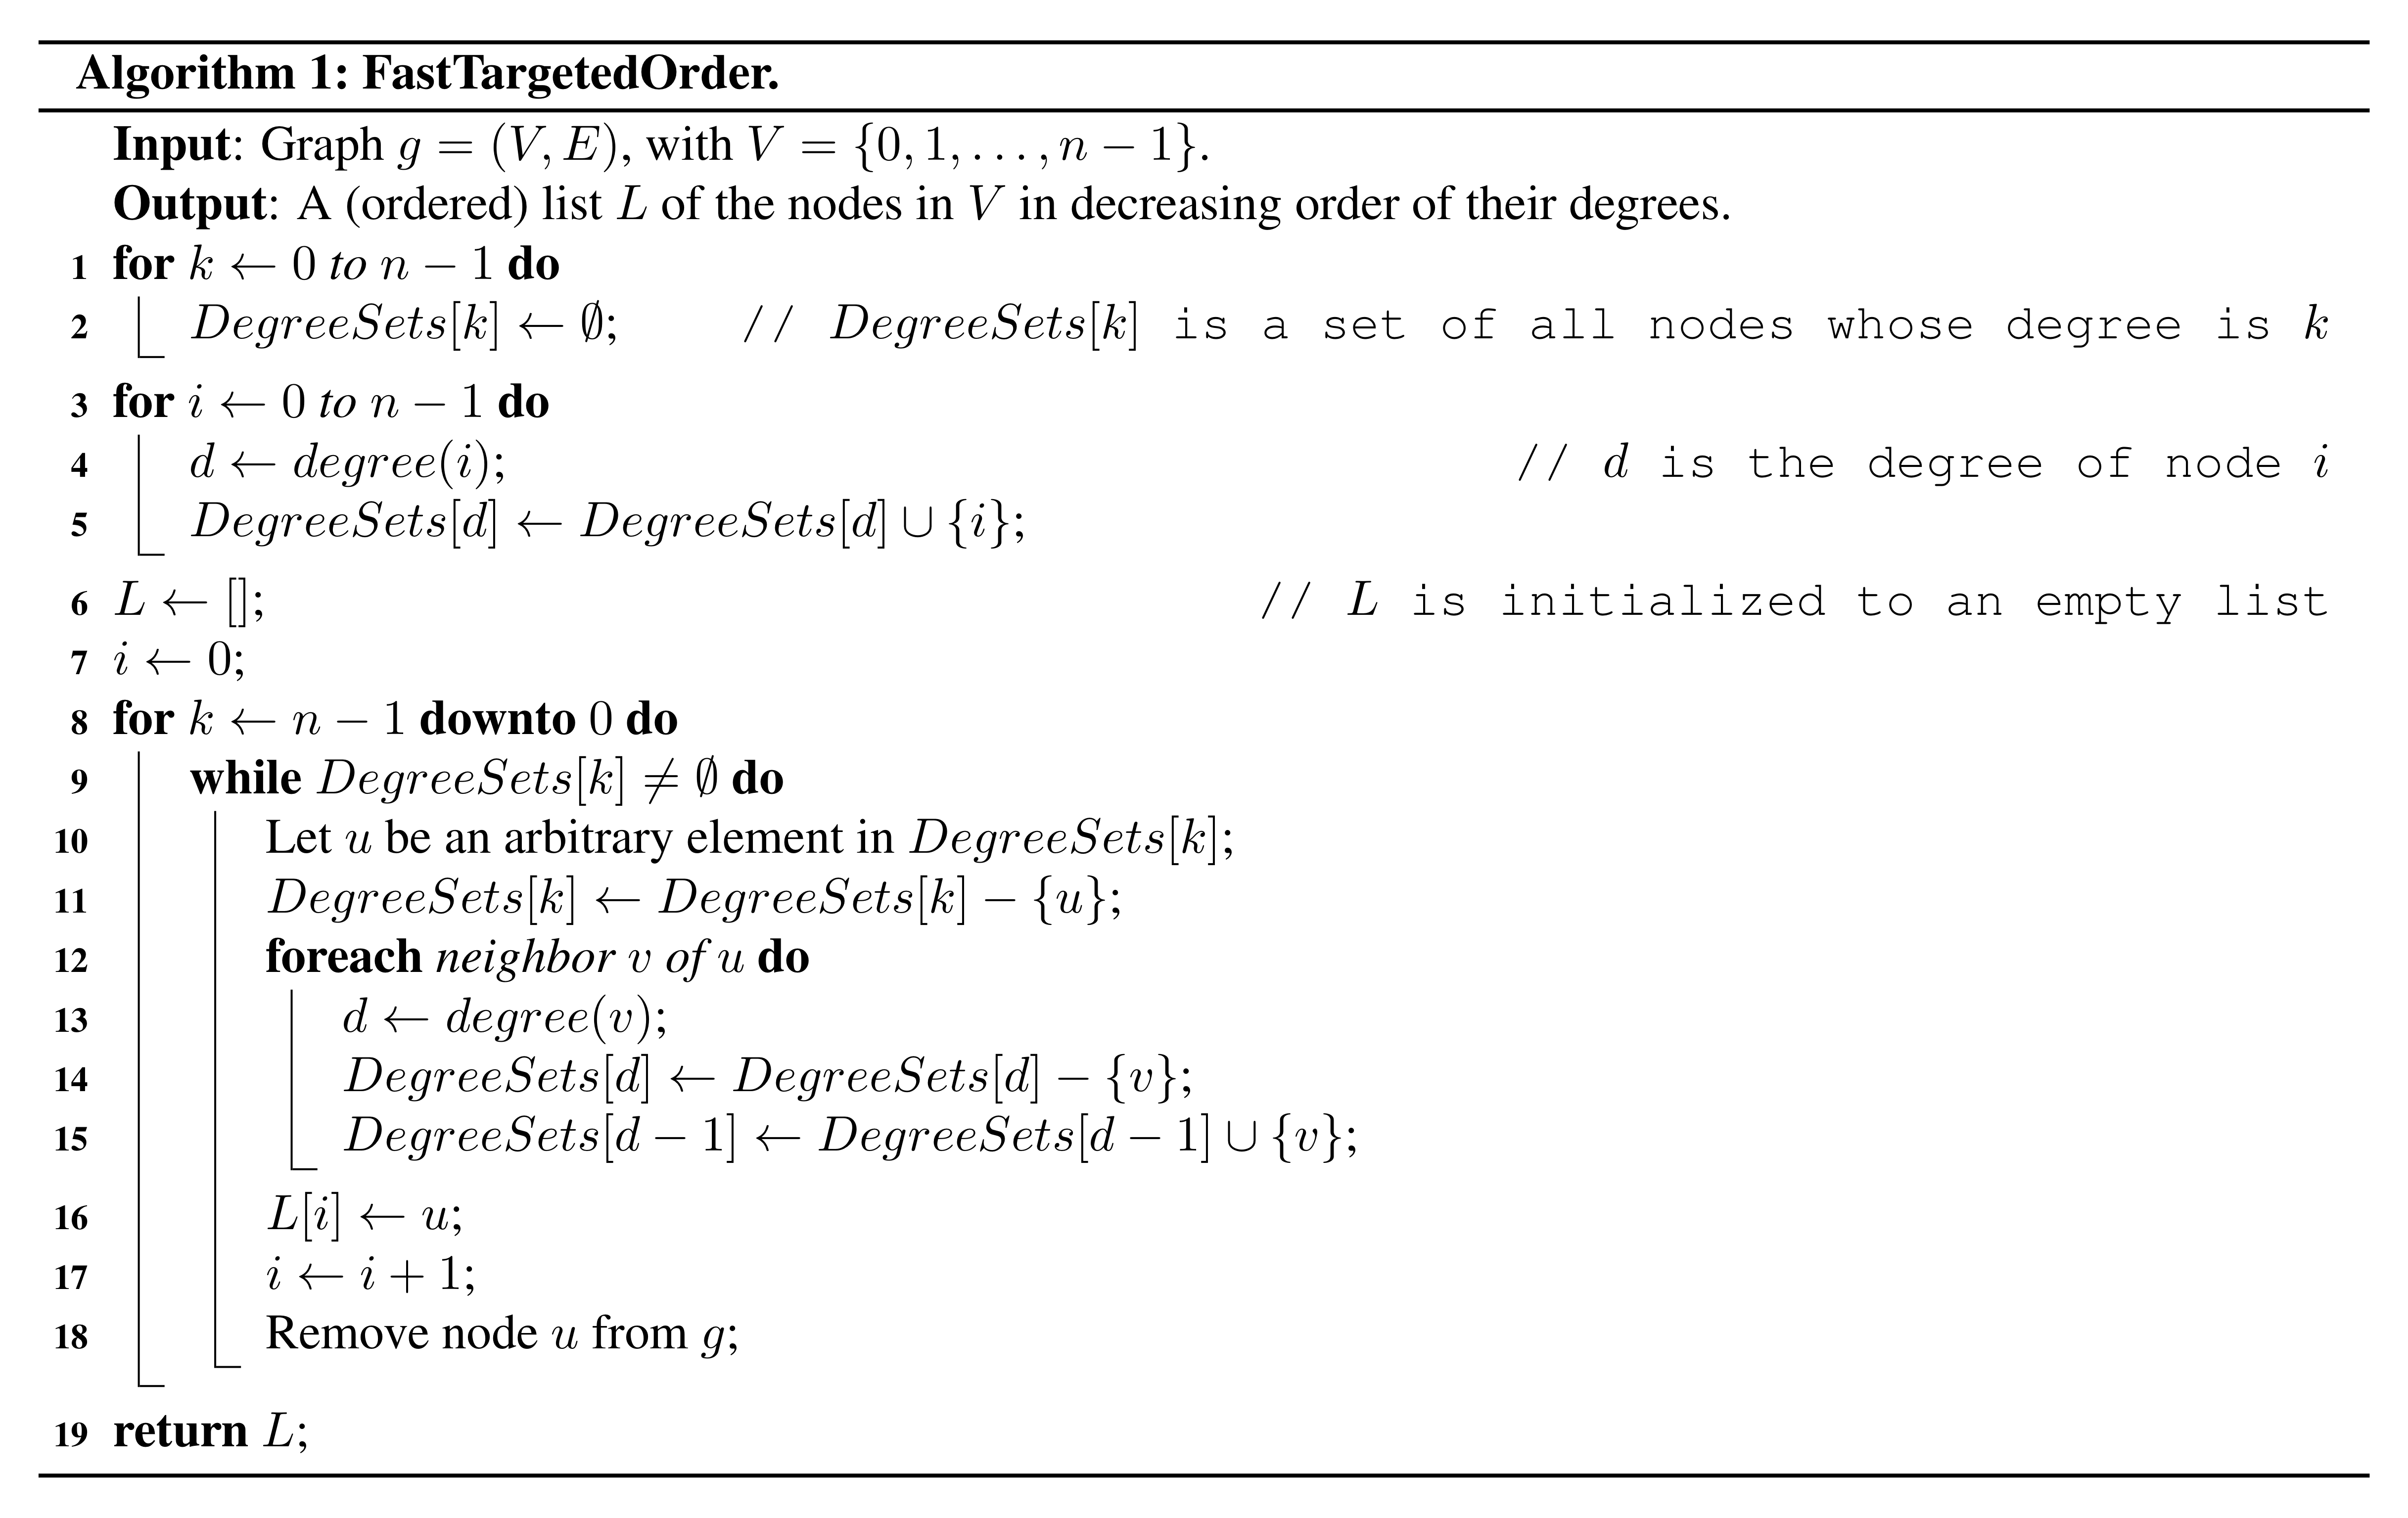

In [17]:
from IPython.display import Image
Image(filename="FastTargetedOrderFig.png", width=750, height=500)

In Python, this method creates a list degree_sets whose kth element is the set of nodes of degree k. The method then iterates through the list degree_sets in order of decreasing degree. When it encounter a non-empty set, the nodes in this set must be of maximum degree. The method then repeatedly chooses a node from this set, deletes that node from the graph, and updates degree_sets appropriately.

For this question, your task is to implement fast_targeted_order and then analyze the running time of these two methods on UPA graphs of size n with m=5. Your analysis should be both mathematical and empirical and include the following:

1. Determine big-O bounds of the worst-case running times of targeted_order and fast_targeted_order as a function of the number of nodes n in the UPA graph.

2. Compute a plot comparing the running times of these methods on UPA graphs of increasing size.

Since the number of edges in these UPA graphs is always less than 5n (due to the choice of m=5), your big-O bounds for both functions should be expressions in n. You should also assume that the all of the set operations used in fast_targeted_order are O(1).
Next, run these two functions on a sequence of UPA graphs with n in range(10, 1000, 10) and m=5 and use the time module (or your favorite Python timing utility) to compute the running times of these functions. Then, plot these running times (vertical axis) as a function of the number of nodes n (horizontal axis) using a standard plot (not log/log). Your plot should consist of two curves showing the results of your timings. 

What are tight upper bounds on the worst-case running times of targeted_order and fast_targeted_order? 

*Answer:* The running time for targeted_order is O(n^2). Since the code is simple, we will leave the analysis to you.

Lines 1-5 in fast_targeted_order take O(n+m) time. The running time for remaining portion of fast_targeted_order is also O(n+m). To arrive at this bound, we note that fast_targeted_order performs a constant number of single item set operations for each node and edge in the graph. Since each of these set operations are assumed to O(1), the running time for this algorithm is O(n+m) where m is the number of edges. Since number of edges in the UPA graph is bounded by 5n, the running time for all of fast_targeted_order is O(n).

In [18]:
def copy_graph(graph):
    """
    Make a copy of a graph
    """
    new_graph = {}
    for node in graph:
        new_graph[node] = set(graph[node])
    return new_graph

In [19]:
def targeted_order(ugraph):
    """
    Compute a targeted attack order consisting
    of nodes of maximal degree
    
    Returns: A list of nodes
    """
    # copy the graph
    new_graph = copy_graph(ugraph)
    
    order = []    
    while len(new_graph) > 0:
        max_degree = -1
        for node in new_graph:
            if len(new_graph[node]) > max_degree:
                max_degree = len(new_graph[node])
                max_degree_node = node
        
        neighbors = new_graph[max_degree_node]
        new_graph.pop(max_degree_node)
        for neighbor in neighbors:
            new_graph[neighbor].remove(max_degree_node)

        order.append(max_degree_node)
    return order

In [20]:
def delete_node(ugraph, node):
    """
    Delete a node from an undirected graph
    """
    neighbors = ugraph[node]
    ugraph.pop(node)
    for neighbor in neighbors:
        ugraph[neighbor].remove(node)

In [21]:
def fast_targeted_order(ugraph):
    '''
    input: an undirected graph
    output: the list of nodes with largest degree in descending order
    '''
    new_graph = copy_graph(ugraph)
    degree_sets = {}
    num_node = len(new_graph.keys())
        
    for degree in range(num_node):
        degree_sets[degree] = set()
    for node, adjlist in new_graph.iteritems():
        deg = len(adjlist)
        degree_sets[deg].add(node)
            
    tar_order = []
    for degree in range(num_node - 1, -1, -1):
        while len(degree_sets[degree]) != 0:
            node_u = random.sample(degree_sets[degree], 1)
            degree_sets[degree].remove(node_u[0])

            for neighbor in new_graph[node_u[0]]:
                deg_neighbor = len(new_graph[neighbor])
                
                if len(degree_sets[deg_neighbor]) != 0:
                    degree_sets[deg_neighbor].remove(neighbor)
                degree_sets[deg_neighbor - 1].add(neighbor)
            tar_order.append(node_u[0])
            delete_node(new_graph, node_u[0])
    return tar_order

In [22]:
def time_UPA_targeted():
    '''
    time the running time of UPA_targeted for UPA(n, 5), n in range(10, 1000, 10)
    output: a list of running times
    '''
    runningtime = []
    for n in range(10,1000,10):
        UPA_graph = UPA(n, 5)
        start_time = time.time()
        UPA_targeted = targeted_order(UPA_graph)
        end_time = time.time()
        t = end_time - start_time
        runningtime.append(t)
    return runningtime

In [23]:
def time_UPA_fast():
    '''
    time the running time of UPA_fast for UPA(n, 5), n in range(10, 1000, 10)
    output: a list of running times
    '''
    runningtime = []
    for n in range(10,1000,10):
        UPA_graph = UPA(n, 5)
        start_time = time.time()
        UPA_fast = fast_targeted_order(UPA_graph)
        end_time = time.time()
        t = end_time - start_time
        runningtime.append(t)
    return runningtime

In [24]:
target = time_UPA_targeted() 
fast = time_UPA_fast() 

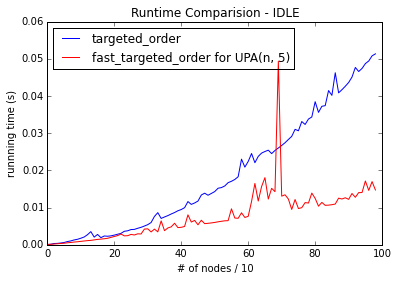

In [25]:
#UPA_rand = random_order(UPA_graph)

plt.plot(target, 'b-', label='targeted_order')
plt.plot(fast, 'r-', label='fast_targeted_order for UPA(n, 5)')
plt.legend(loc='upper left')
plt.ylabel('runnning time (s)')
plt.xlabel('# of nodes / 10')
plt.title('Runtime Comparision - IDLE')
plt.show()

Note that the timing curve for fast_targeted_order should be approximately linear while the timing curve for targeted_order should be quadratic. The scale on vertical axis may vary significantly since different machines have different processing power. For example, plots generated in CodeSkulptor may require 20-50 times more time than plots generated in IDLE.

Also, note that the curves in the plot may be somewhat noisy (bumpy). This shape is the result of Python's garbage collector (and other activities on the computer) slowing Python's performance and should not affect your scoring.

## Question 4 ##

To continue our analysis of the computer network, we will examine its resilience under an attack in which servers are chosen based on their connectivity. We will again compare the resilience of the network to the resilience of ER and UPA graphs of similar size.
Using targeted_order (or fast_targeted_order), your task is to compute a targeted attack order for each of the three graphs (computer network, ER, UPA) from Question 1. Then, for each of these three graphs, compute the resilience of the graph using compute_resilience. Finally, plot the computed resiliences as three curves (line plots) in a single plot. 

In [26]:
ER_graph = make_ergraph(1347, 0.004)
display_state(ER_graph)
ER_fast = fast_targeted_order(ER_graph)
ER_fast_resilience = compute_resilience(ER_graph, ER_fast)

------------------
num_node:  1347
num_edge:  7391
------------------


In [27]:
UPA_graph = UPA(1347, 2)
display_state(UPA_graph)
UPA_fast = fast_targeted_order(UPA_graph)
UPA_fast_resilience = compute_resilience(UPA_graph, UPA_fast)

------------------
num_node:  1347
num_edge:  2679
------------------


In [28]:
ANS_graph = load_graph(NETWORK_URL)
display_state(ANS_graph)
ANS_fast = fast_targeted_order(ANS_graph)
ANS_fast_resilience = compute_resilience(ANS_graph, ANS_fast)

Loaded graph with 1239 nodes
------------------
num_node:  1239
num_edge:  3047
------------------


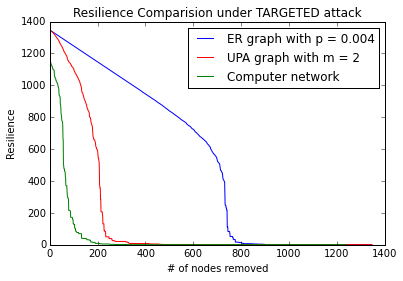

In [29]:
plt.plot(ER_fast_resilience, '-b', label='ER graph with p = 0.004')
plt.plot(UPA_fast_resilience, '-r', label='UPA graph with m = 2')
plt.plot(ANS_fast_resilience, '-g', label='Computer network')
plt.legend(loc='upper right')
plt.ylabel('Resilience')
plt.xlabel('# of nodes removed')
plt.title('Resilience Comparision under TARGETED attack')
plt.show()

In general, the resilience for all three graphs should drop towards zero very quickly with the ER graph being most resilient and the computer network being least resilient. If the submitted plot for the m=3 UPA curve is shifted significantly to the left and instead looks like the solution plot for the m=2 UPA curve, score that curve as being incorrect since this shift indicates that incorrect probabilities were used in computing the UPA graph.

## Question 5 ##

Now, consider removing a significant fraction of the nodes in each graph using targeted_order. Examine the shape of the three curves from your plot in Question 4. Which of the three graphs are resilient under targeted attacks as the first 20% of their nodes are removed? Again, note that there is no need to compare the three curves against each other in your answer to this question.

*Answer:* The slope of the ER curve is close to −1 as the first 20% of the nodes in the graph are removed. Therefore, the ER graph is resilient to targeted attacks of this type.  

On the other hand, the size of the largest connected component in the computer network drops to almost zero when the first 20% of the nodes are removed.   Therefore, the computer network should not be listed as being resilient.

The UPA graph is a close call.  For m=2,  the size of the largest connected component drops to zero fairly quickly as 20% of the nodes are removed. For m=3, this size is fairly close to the number of nodes remaining as 20% of the nodes are removed and is just starting to drop signficantly.  So, either choice (listing the UPA graph as being resilient or not listing the UPA graph as being resilient) should be counted as correct.

## Question 6 ##

An increasing number of people with malevolent intent are interested in disrupting computer networks. If you found one of the two random graphs to be more resilient under targeted attacks than the computer network, do you think network designers should always ensure that networks' topologies follow that random model? Think about the considerations that one might have to take into account when designing networks and provide a short explanation for your answer.

*Answer:* No. Many factors, such as geography, distance, and cost, influence real-world network designs. For example, while an ER graph might be resilient to targeted attacks, it might be very costly to build, or might not be doable given the geographic locations of the routers in the network.